In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

ImportError: cannot import name 'Timedelta'

In [3]:
from fruit_data import get_data, filelist_from_directory, create_dataset 

In [4]:
directory = './data/InstagramData/'

filelist = filelist_from_directory(directory)

In [7]:
#Random picture:
randselect = np.random.randint(len(directory))

photo = filelist['Full filename'].iloc[randselect];
im = mpimg.imread(photo);
print('image selected')

image selected


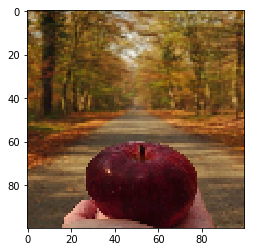

In [8]:
with tf.Session() as sess:
    im = tf.image.resize_images(im, (100,100)).eval(session=sess).astype(int)
plt.imshow(im)

# Load model

In [2]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.models import load_model
path = './saved_models/model1/trained_model.h5'
model = load_model(path)

In [ ]:
model.predict_classes(im.reshape[1,100,100,3])

In [ ]:
json_file = open('./saved_models/model1/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
loaded_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_test)

In [ ]:
filelist_test = pd.read_csv('./Dataset_index/limited_testing_1000_records.csv' )
X_test,y_test = create_dataset(filelist_test)

X_test = X_test/255
y_test = label_encoder.transform(y_test)

In [ ]:
loaded_model.evaluate(X_test, y_test)